In [6]:
from onexmatch import onexmatch
%config InlineBackend.figure_format ='retina'

help(onexmatch)

Help on function onexmatch in module onexmatch.core:

onexmatch(my_labels, your_labels, max_sep_arcsec=1, ambiguity_arcsec=None, verbose=True, make_plot=True, show_duplicates=True, draw_lines=False)
    Perform a sky coordinate crossmatch between two catalogs.

    Parameters:
        my_labels (dict): Dictionary with keys:
            'file' (str, optional): Path to the first catalog CSV file.
            'df' (pd.DataFrame, optional): DataFrame containing the first catalog.
            'label' (str): Short name for the survey (used in column naming).
            'id' (str or list of str): Name(s) of the unique ID column(s).
            'ra' (str): Name of the Right Ascension column (in degrees).
            'dec' (str): Name of the Declination column (in degrees).
            'extra_columns' (list, optional): Additional columns to include in the output.
            One of 'file' or 'df' must be provided.

        your_labels (dict): Same structure as my_labels, for the second catalog

Number of objects in J-NEP: 3383
Number of objects in MoonObs: 950
Number of matches after imposing the constraint: 483
Number of matches after filtering ambiguous matches: 423
Number of matches after removing duplicates: 417
Output file saved to: /Users/rjovale/GitHub/onexmatch/example/onexmatch_J-NEP_MoonObs.csv


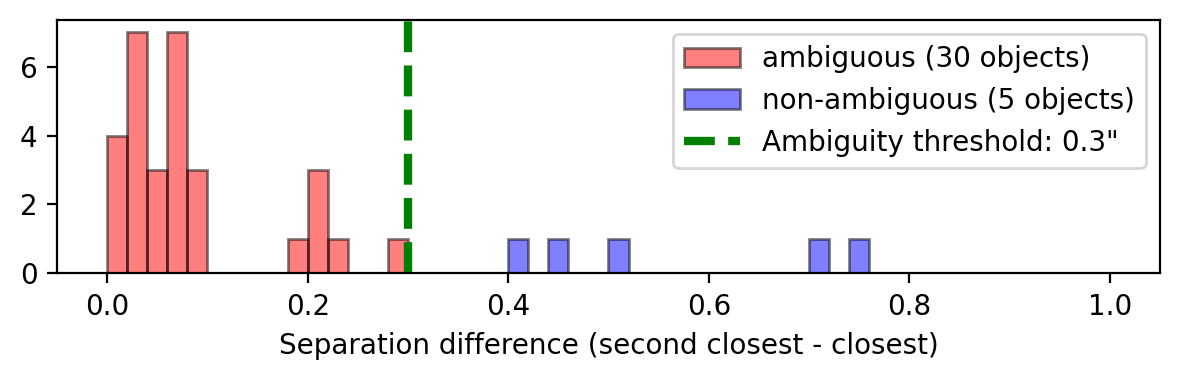


Plot saved to: /Users/rjovale/GitHub/onexmatch/example/onexmatch_J-NEP_MoonObs_sep_and_skyplot.png


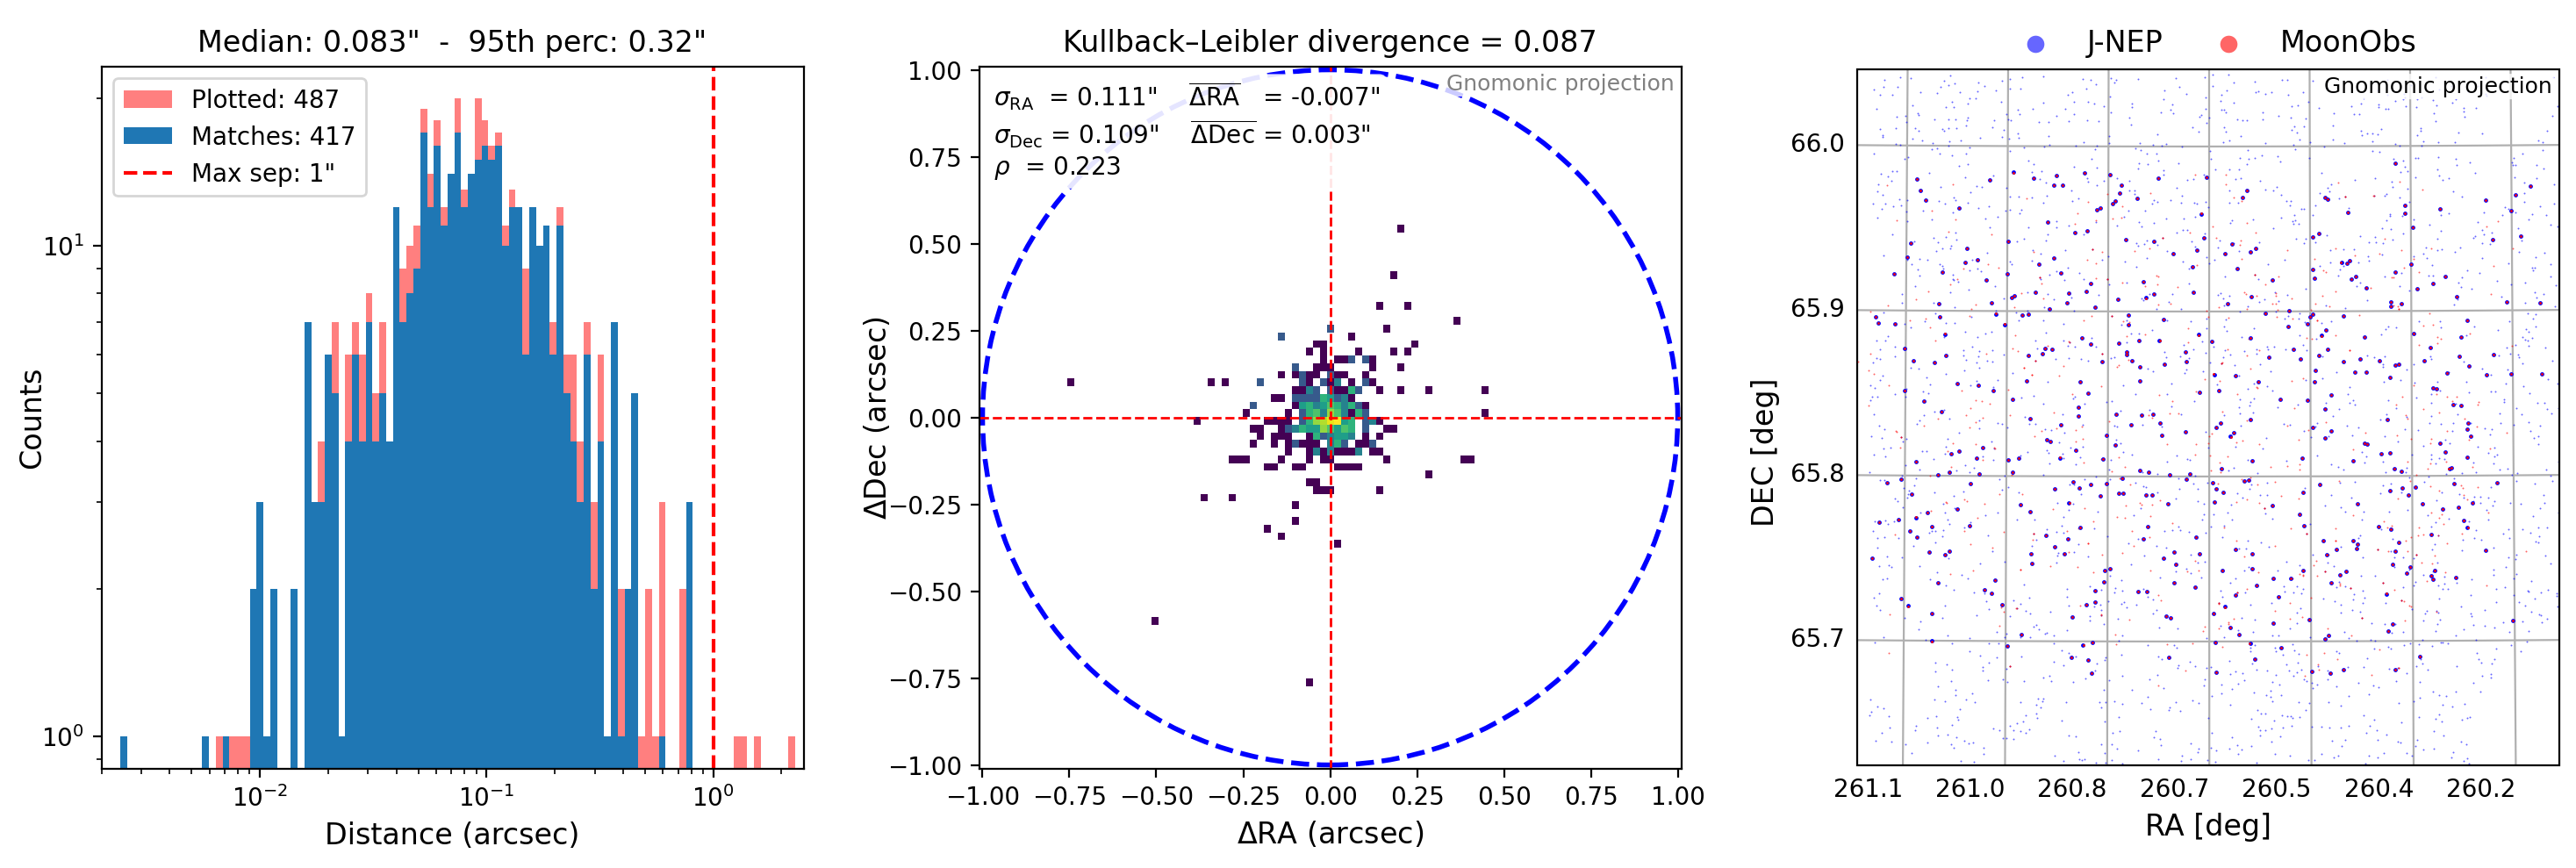

In [7]:
matched_df = onexmatch(
    my_labels={
        'file': 'jnep.csv', # or 'df': my_df
        'label': 'J-NEP',
        'id': ['TILE_ID', 'NUMBER'],
        'ra': 'RA',
        'dec': 'DEC',
        'extra_columns': ['MAG_AUTO_56', 'sglc_prob_star']
    },
    your_labels={
        'file': 'MoonObs.csv', # or 'df': my_df
        'label': 'MoonObs',
        'id': 'OBJID', # Optional
        'ra': 'RA',
        'dec': 'DEC',
        'extra_columns': ['Z']
    },
    max_sep_arcsec=1.0,
    ambiguity_arcsec=0.3,
    verbose=True,
    make_plot=True,
    show_duplicates=True
    )

In [8]:
matched_df.head()

,TILE_ID,NUMBER,RA,DEC,OBJID_MoonObs,RA_MoonObs,DEC_MoonObs,separation_arcsec,MAG_AUTO_56,sglc_prob_star,Z
0,2520,9645,260.751417,65.735380,9685,260.751417,65.735380,0.002425,19.846770,0.001,1.389665
1,2520,10029,260.854009,65.742945,9493,260.854012,65.742946,0.005854,21.841862,0.000,0.556272
2,2520,17140,260.696019,65.882125,5299,260.696014,65.882125,0.006979,18.601212,1.000,1.250438
3,2520,11271,260.431920,65.767533,7517,260.431913,65.767533,0.009259,20.021849,1.000,1.119850
4,2520,9309,260.805573,65.730158,8731,260.805578,65.730157,0.009637,21.445347,0.000,1.017717
